<a href="https://colab.research.google.com/github/astroterricola/Data-Science/blob/main/t3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pregunta 1 (4 puntos)
Escribir una función que permita hacer ajuste de polinomios usando batch gradient descent. Esta deberá recibir
los siguientes argumentos:
• Arreglos con los valores X e Y.
• Una keyword grad (con valor por defecto 1) que indique el grado del polinomio a ajustar a los datos.
• Una keyword eta (con valor por defecto 0.001) para indicar el valor de la learning rate.
• Una keyword max_iter (con valor por defecto 100000) para indicar el máximo de iteraciones permitidas
para el algoritmo.
• Una keyword gtol (con valor por defecto 1e-6) para indicar el umbral de tolerancia para el criterio de
convergencia por la norma del gradiente.
La función debe retornar una lista con los parámetros óptimos y el valor del R-squared.
Algunos consejos sobre la estructura de la función:
• La función auxiliar de cálculo del gradiente puede implementar el cómputo de las derivadas parciales
(cuya cantidad depende del grado del polinomio) usando un bucle, dada la regularidad de la forma
algebraica de estas.
• Se puede definir la lista con los valores aleatorios iniciales de los parámetros usando el hecho de que la
cantidad necesaria de ellos es grad + 1. Por ejemplo, los parámetros de un polinomio de grado 3 son 4.
• La lista de atributos se puede compilar como vimos en clase, usando el hecho de que debemos agregar
tantas potencias de la variable independiente X como grados tenga el polinomio. Eso se puede
automatizar usando un bucle.
• Con estos preparativos, el cuerpo del gradient descent es el mismo que el estudiado en clases. No olvidar
incluir en este el criterio de convergencia (o de máximas iteraciones).
• Para calcular el coeficiente de determinación se pueden usar bucles para generar las predicciones para
cada punto (tupla de atributos), considerando la cantidad de términos necesarias según el orden del
polinomio ajustado.

Se crea repositor con funciones basicas nobmre repositorio : Data-Science nombre funcion : lf_fx_random.py

para pregunta 1, solo a modo de prueba, se pretende demostrar que utilizando librerias numpy y desarrollando todas las funciones los resultados obtenidos son similares, adicionalmente se creas procedimientos locales dentro del main
procedimiento se solicitan coef de polinomio...se generan 2 graficos con datos obtenidos x funciones de numpy o otro con funciones creadas por mi , para ver similutudes, a posterior de detallan los graficos, por ultimo el codigo te indica si quieres seguir o no para graficar nuevamente

In [17]:
import pandas as pd
import os
# procedimiento de linkear repositorio github
from collections import Counter
import matplotlib.pyplot as plt

# Clonar el repositorio
lc_GH = "https://github.com/astroterricola/Data-Science.git"
os.system(f"git clone {lc_GH}")

# Cambiar al directorio del repositorio clonado
os.chdir("Data-Science")

# Importar funciones desde lc_function2.py
from lf_fx_random import lf_rango,lf_media,lf_desviacion_estandar,lf_evaluar_polinomio,lf_evaluar_polinomio_todos,lf_norma


Ingrese los coeficientes del polinomio verdadero (de grado 2):
Coeficiente para x^2: 9
Coeficiente para x^1: 2
Coeficiente para x^0: 1


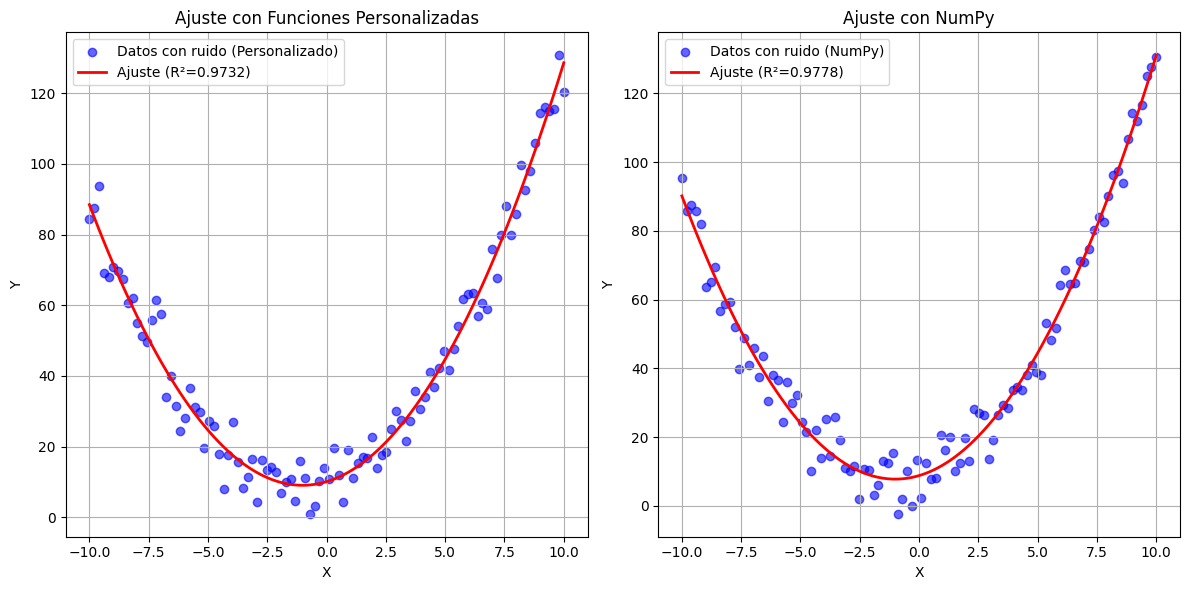


Explicación del gráfico:
1. Izquierda: Ajuste realizado con funciones personalizadas.
2. Derecha: Ajuste realizado con NumPy.
3. Ambos gráficos muestran los datos con ruido, el ajuste polinómico y el coeficiente R² para evaluar la calidad del ajuste.



In [ ]:
import matplotlib.pyplot as plt
import random

"""
para clara codificacion de procedimientos, funciones variables se ha definido el sigueinte protocolo
Definición de prefijos utilizados:
- "lf_": Prefijo para funciones locales.
- "lv_": Prefijo para variables locales
- "lp_": Prefijo para parámetros locales.
El uso de estos prefijos tiene como objetivo mejorar la comprensión y organización del código.
adicionalmente de igual manera se han definidio funciones locales dentro del main del proyecto
"""

def lf_aleatorios(lp_tamano):
    """
    Genera una lista de valores aleatorios entre 0 y 1.

    Parámetros:
    - lp_tamano (int): Tamaño de la lista.

    Retorna:
    - List[float]: Lista de valores aleatorios.
    """
    return [random.random() for _ in range(lp_tamano)]


# Implementación de regresión
def lf_regresion_polinomica(lv_X, lv_Y, lp_grado=1, lp_tasa_aprendizaje=0.001, lp_max_iteraciones=100000, lp_tolerancia=1e-6):
    """
    Realiza un ajuste de regresión polinómica utilizando descenso de gradiente.

    Parámetros:
    - lv_X (List[float]): Lista de valores independientes normalizados.
    - lv_Y (List[float]): Lista de valores dependientes.
    - lp_grado (int): Grado del polinomio.
    - lp_tasa_aprendizaje (float): Tasa de aprendizaje para el descenso de gradiente.
    - lp_max_iteraciones (int): Número máximo de iteraciones del algoritmo.
    - lp_tolerancia (float): Tolerancia para el criterio de convergencia.

    Retorna:
    - Tuple[List[float], float]: Coeficientes del polinomio ajustado y el coeficiente de determinación R².
    """
    lv_num_parametros = lp_grado + 1
    lv_parametros = lf_aleatorios(lv_num_parametros)

    def lf_calcular_gradiente(lv_X, lv_Y, lv_parametros):
        """
        Calcula el gradiente del error respecto a los parámetros del polinomio.

        Parámetros:
        - lv_X (List[float]): Lista de valores independientes normalizados.
        - lv_Y (List[float]): Lista de valores dependientes.
        - lv_parametros (List[float]): Coeficientes actuales del polinomio.

        Retorna:
        - List[float]: Gradiente calculado.
        """
        lv_gradiente = [0] * lv_num_parametros
        lv_n = len(lv_X)
        for lv_i in range(lv_num_parametros):
            lv_gradiente[lv_i] = -2 / lv_n * sum((lv_Y[lv_j] - lf_evaluar_polinomio(lv_parametros[::-1], lv_X[lv_j])) * (lv_X[lv_j] ** lv_i) for lv_j in range(lv_n))
        return lv_gradiente

    def lf_calcular_r_cuadrado(lv_Y, lv_Y_pred):
        """
        Calcula el coeficiente de determinación R².

        Parámetros:
        - lv_Y (List[float]): Valores reales.
        - lv_Y_pred (List[float]): Valores predichos.

        Retorna:
        - float: Coeficiente de determinación R².
        """
        lv_suma_total = sum((lv_y - lf_media(lv_Y)) ** 2 for lv_y in lv_Y)
        lv_suma_residual = sum((lv_Y[lv_i] - lv_Y_pred[lv_i]) ** 2 for lv_i in range(len(lv_Y)))
        return 1 - (lv_suma_residual / lv_suma_total)

    lv_iteracion = 0
    lv_convergio = False

    while lv_iteracion < lp_max_iteraciones and not lv_convergio:
        lv_gradiente = lf_calcular_gradiente(lv_X, lv_Y, lv_parametros)
        lv_parametros = [lv_parametros[lv_i] - lp_tasa_aprendizaje * lv_gradiente[lv_i] for lv_i in range(lv_num_parametros)]
        lv_convergio = lf_norma(lv_gradiente) < lp_tolerancia
        lv_iteracion += 1

    lv_Y_predicho = lf_evaluar_polinomio_todos(lv_parametros[::-1], lv_X)
    lv_r_cuadrado = lf_calcular_r_cuadrado(lv_Y, lv_Y_predicho)
    return lv_parametros, lv_r_cuadrado

# Programa principal
if __name__ == "__main__":
    lv_continuar = True
    while lv_continuar:
        print("Ingrese los coeficientes del polinomio verdadero (de grado 2):")
        lv_parametros_verdaderos = []
        for lv_i in range(3):
            lv_coeficiente = float(input(f"Coeficiente para x^{2 - lv_i}: "))
            lv_parametros_verdaderos.append(lv_coeficiente)

        # Datos generados con funciones propias
        lv_X = lf_rango(-10, 10, 100)
        lv_Y = [lf_evaluar_polinomio(lv_parametros_verdaderos[::-1], lv_x) + random.gauss(0, 5) for lv_x in lv_X]

        # Normalización de datos
        lv_media_X, lv_desviacion_X = lf_media(lv_X), lf_desviacion_estandar(lv_X)
        lv_X_normalizado = [(lv_x - lv_media_X) / lv_desviacion_X for lv_x in lv_X]

        # Ajuste con nuestras funciones
        lv_parametros_personalizados, lv_r_cuadrado_personalizado = lf_regresion_polinomica(lv_X_normalizado, lv_Y, lp_grado=2, lp_tasa_aprendizaje=0.001, lp_max_iteraciones=10000, lp_tolerancia=1e-6)
        lv_Y_predicho_personalizado = lf_evaluar_polinomio_todos(lv_parametros_personalizados[::-1], lv_X_normalizado)

        # Ajuste con numpy para comparación
        import numpy as np
        lv_Y_numpy = np.polyval(lv_parametros_verdaderos[::-1], lv_X) + np.random.normal(scale=5, size=len(lv_X))
        lv_X_numpy_normalizado = (np.array(lv_X) - np.mean(lv_X)) / np.std(lv_X)
        lv_parametros_numpy, lv_r_cuadrado_numpy = lf_regresion_polinomica(lv_X_numpy_normalizado.tolist(), lv_Y_numpy.tolist(), lp_grado=2, lp_tasa_aprendizaje=0.001, lp_max_iteraciones=10000, lp_tolerancia=1e-6)
        lv_Y_predicho_numpy = np.polyval(lv_parametros_numpy[::-1], lv_X_numpy_normalizado)

        # Gráfico generado con funciones propias
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(lv_X, lv_Y, label='Datos con ruido (Personalizado)', color='blue', alpha=0.6)
        plt.plot(lv_X, lv_Y_predicho_personalizado, label=f'Ajuste (R²={lv_r_cuadrado_personalizado:.4f})', color='red', linewidth=2)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Ajuste con Funciones Personalizadas')
        plt.legend()
        plt.grid()

        # Gráfico generado con numpy
        plt.subplot(1, 2, 2)
        plt.scatter(lv_X, lv_Y_numpy, label='Datos con ruido (NumPy)', color='blue', alpha=0.6)
        plt.plot(lv_X, lv_Y_predicho_numpy, label=f'Ajuste (R²={lv_r_cuadrado_numpy:.4f})', color='red', linewidth=2)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Ajuste con NumPy')
        plt.legend()
        plt.grid()

        plt.tight_layout()
        plt.show()

        print("\nExplicación del gráfico:")
        print("1. Izquierda: Ajuste realizado con funciones personalizadas.")
        print("2. Derecha: Ajuste realizado con NumPy.")
        print("3. Ambos gráficos muestran los datos con ruido, el ajuste polinómico y el coeficiente R² para evaluar la calidad del ajuste.\n")

        lv_reintentar = input("¿Desea ingresar otros coeficientes? (s/n): ").strip().lower()
        lv_continuar = (lv_reintentar == 's')

    print("Gracias x testear, nos vemos!")



Pregunta 2 (4 puntos)
Escribir una función que permita hacer ajuste de polinomios usando mini-batch gradient descent. Esta deberá
recibir los siguientes argumentos:
• Arreglos con los valores X e Y.
• Una keyword grad (con valor por defecto 1) que indique el grado del polinomio a ajustar a los datos.
• Una keyword n_epocas (con valor por defecto 1000) para indicar el número de épocas del algoritmo.
• Una keyword batch_size (con valor por defecto 10) para indicar el tamaño de los mini-lotes de datos.
• Keywords t0 y t1 (con valores por defecto 5 y 50, respectivamente) para indicar los hiperparámetros de
la learning schedule.
• Una keyword learning_rate (con valor por defecto None) que en caso de ser definida por el usuario
suprima la llamada a la función auxiliar learning_schedule, dejando la learning rate fija al valor
proporcionado por el usuario.
La función debe retornar una lista con los parámetros óptimos y el valor del R-squared.
Algunos consejos sobre la estructura de la función:
• La función auxiliar de cálculo del gradiente es la misma que utiliza la función de batch gradient descent
escrita arriba.
• Se puede definir la lista con los valores aleatorios iniciales de los parámetros usando el hecho de que la
cantidad necesaria de ellos es grad + 1. Por ejemplo, los parámetros de un polinomio de grado 3 son 4.
• La lista de atributos se puede compilar como vimos en clase, usando el hecho de que debemos agregar
tantas potencias de la variable independiente X como grados tenga el polinomio. Eso se puede
automatizar usando un bucle.
• En el cuerpo del mini-batch gradient descent, al momento de definir la learning rate, debe implementar
dos opciones: si la keywork learning_rate es None, entonces debe llamarse a la función auxiliar
learning_schedule (definida tal como vimos en clase) para calcular su valor (que entonces dependerá de
la época). Si en cambio la keywork learning_rate tiene un valor, entonces debe adoptarse este (con lo
que la learning rate será un número fijo para todas las épocas).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

"""
Definición de prefijos utilizados:
- "lf_": Prefijo para funciones locales.
- "lv_": Prefijo para variables locales.
- "lp_": Prefijo para parámetros locales.
El uso de estos prefijos tiene como objetivo mejorar la comprensión y organización del código.
"""

def lf_learning_schedule(lp_t0, lp_t1, lp_epoch):
    """
    Calcula la tasa de aprendizaje dinámicamente basada en los hiperparámetros t0, t1 y la época.

    Parámetros:
    - lp_t0 (float): Hiperparámetro t0 para el learning schedule.
    - lp_t1 (float): Hiperparámetro t1 para el learning schedule.
    - lp_epoch (int): Época actual del algoritmo.

    Retorna:
    - float: Tasa de aprendizaje calculada dinámicamente.
    """
    return lp_t0 / (lp_epoch + lp_t1)

def lf_calcular_gradiente(lv_X, lv_Y, lv_parametros):
    """
    Calcula el gradiente del error respecto a los parámetros del polinomio.

    Parámetros:
    - lv_X (np.ndarray): Arreglo de valores independientes.
    - lv_Y (np.ndarray): Arreglo de valores dependientes.
    - lv_parametros (np.ndarray): Coeficientes actuales del polinomio.

    Retorna:
    - np.ndarray: Gradiente calculado.
    """
    lv_n = len(lv_X)
    lv_gradiente = np.zeros_like(lv_parametros)
    for lv_j in range(len(lv_parametros)):
        lv_gradiente[lv_j] = -2 / lv_n * np.sum((lv_Y - np.polyval(lv_parametros[::-1], lv_X)) * (lv_X ** lv_j))
    return lv_gradiente

def lf_ajuste_polinomio_mini_batch(lv_X, lv_Y, grad=1, n_epocas=1000, batch_size=10, t0=5, t1=50, learning_rate=None):
    """
    Ajusta un polinomio a los datos utilizando mini-batch gradient descent.

    Parámetros:
    - lv_X (np.ndarray): Arreglo con los valores independientes.
    - lv_Y (np.ndarray): Arreglo con los valores dependientes.
    - grad (int): Grado del polinomio a ajustar (por defecto 1).
    - n_epocas (int): Número de épocas del algoritmo (por defecto 1000).
    - batch_size (int): Tamaño de los mini-lotes de datos (por defecto 10).
    - t0 (float): Hiperparámetro t0 para el learning schedule (por defecto 5).
    - t1 (float): Hiperparámetro t1 para el learning schedule (por defecto 50).
    - learning_rate (float or None): Tasa de aprendizaje fija (opcional, por defecto None).

    Retorna:
    - Tuple[np.ndarray, float]: Lista de parámetros óptimos y el coeficiente R².
    """
    # Inicialización de parámetros aleatorios
    lv_parametros = np.random.rand(grad + 1)
    lv_n = len(lv_X)

    for lp_epoch in range(n_epocas):
        # Shuffle de los datos
        lv_indices = np.random.permutation(lv_n)
        lv_X_shuffled = lv_X[lv_indices]
        lv_Y_shuffled = lv_Y[lv_indices]

        for lp_i in range(0, lv_n, batch_size):
            lv_X_batch = lv_X_shuffled[lp_i:lp_i + batch_size]
            lv_Y_batch = lv_Y_shuffled[lp_i:lp_i + batch_size]

            # Calcular tasa de aprendizaje
            if learning_rate is None:
                lp_tasa_aprendizaje = lf_learning_schedule(t0, t1, lp_epoch)
            else:
                lp_tasa_aprendizaje = learning_rate

            # Calcular gradiente y actualizar parámetros
            lv_gradiente = lf_calcular_gradiente(lv_X_batch, lv_Y_batch, lv_parametros)
            lv_parametros -= lp_tasa_aprendizaje * lv_gradiente

    # Calcular R²
    lv_Y_pred = np.polyval(lv_parametros[::-1], lv_X)
    lv_suma_total = np.sum((lv_Y - np.mean(lv_Y)) ** 2)
    lv_suma_residual = np.sum((lv_Y - lv_Y_pred) ** 2)
    lv_r2 = 1 - (lv_suma_residual / lv_suma_total)

    return lv_parametros, lv_r2

# Ejemplo de uso
if __name__ == "__main__":
    # Datos de ejemplo
    lv_X = np.linspace(-10, 10, 100)
    lv_Y = 3 * lv_X**2 + 2 * lv_X + 1 + np.random.normal(scale=5, size=lv_X.shape)

    # Ajuste con mini-batch gradient descent
    lv_parametros, lv_r2 = lf_ajuste_polinomio_mini_batch(lv_X, lv_Y, grad=2, n_epocas=1000, batch_size=10)

    print("Parámetros ajustados:", lv_parametros)
    print("Coeficiente de determinación R²:", lv_r2)

    # Gráfico del ajuste
    plt.scatter(lv_X, lv_Y, label="Datos", color="blue", alpha=0.6)
    plt.plot(lv_X, np.polyval(lv_parametros[::-1], lv_X), label=f"Ajuste (R²={lv_r2:.4f})", color="red")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Ajuste Polinómico con Mini-Batch Gradient Descent")
    plt.legend()
    plt.grid()
    plt.show()
